# Setup

In [1]:
using DifferentialEquations, DiffEqBayes, Plots, Turing, Interpolations

# Three node network

Based on lorenz example. Writing out the system of equations individually instead of looping through each node.

In [2]:
phi(a::Number) = (exp(2*a)-1)/(exp(2*a)+1)

phi (generic function with 1 method)

In [163]:
function additive_noise(du,u,p,t)
    s,g,W,I = p
    for i = 1:length(u)
#         du[i] = 0 #no noise
        du[i] = .1 #N(0, dt)
    end
end

function network_model(du,u,p,t)
    s,g,W,I = p
    for i=1:length(u)
        du[i] = -u[i] + s*phi(u[i]) + g*(sum(W[i,:].*u)) + I(t)
    end
end

network_model (generic function with 1 method)

In [170]:
num_nodes = 3
u0 = repeat([0.0], num_nodes)
Tmax = 100.0
tspan = (0,Tmax)

s = 0.3
g = 0.7
W = [0.0 0.2 0.0; 0.4 0.0 0.0; 0.0 0.3 0.0]

ts = 1:1:Tmax
task = repeat([0.0], 100)
# task[4] = 1 #without impulse it'd be "resting state"
I = LinearInterpolation(ts, task, extrapolation_bc = 0)
dt = 0.5

p = [s,g,W,I]

prob_sde = SDEProblem(network_model,additive_noise,u0,tspan,p)


SDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.0, 0.0, 0.0]

In [171]:
sol = solve(prob_sde, dt=dt, adaptive=false)

retcode: Success
Interpolation: 1st order linear
t: 201-element Array{Float64,1}:
   0.0
   0.5
   1.0
   1.5
   2.0
   2.5
   3.0
   3.5
   4.0
   4.5
   5.0
   5.5
   6.0
   ⋮
  94.5
  95.0
  95.5
  96.0
  96.5
  97.0
  97.5
  98.0
  98.5
  99.0
  99.5
 100.0
u: 201-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0]
 [-0.05476428815865901, 0.04581780434768347, 0.07629600131493265]
 [-0.05921198074234794, 0.06330811261597159, -0.010927871097848985]
 [0.15762983995115543, 0.11287311243969693, 0.1431915598207921]
 [0.11243066389649933, 0.04938512631063217, 0.08694392919934679]
 [0.11922553099402475, 0.05587594614050687, 0.015724326872089297]
 [0.09103165845170721, 0.07328745966284411, 0.02452422942521858]
 [0.03142809922658873, 0.1921147328272806, -0.07565042384600607]
 [0.09479836988806987, 0.06971971740062076, 0.04952788735619172]
 [-0.026124973702721828, 0.1539378864152938, -0.01877112590991237]
 [-0.0019326718773973715, 0.1813179352551689, -0.05387848037105994]
 [-0.027529987818606

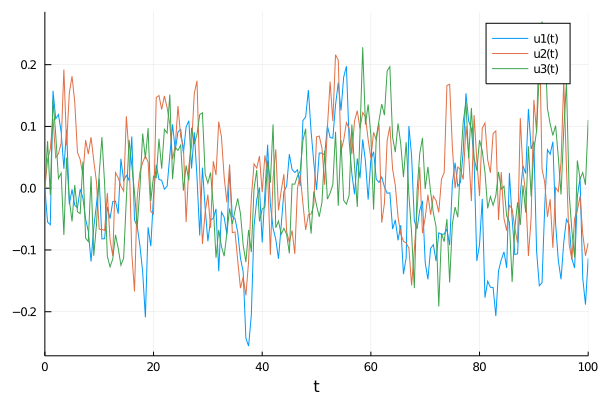

In [172]:
plot(sol)

Figure out how dt comes into play and then how to invert this model.